In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# NEW ZEALAND - COVID-19 DATA ANALYSIS

#### Auth: Albert Zhang

In [2]:

import time
import datetime

##time_now
now = datetime.datetime.now()
print(now)


2020-03-30 13:12:06.167606


In [3]:
x = datetime.datetime.now()

print(x.strftime("%x"))

03/30/20


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

%pip --version

pip 19.2.3 from E:\Anaconda3\lib\site-packages\pip (python 3.7)

Note: you may need to restart the kernel to use updated packages.


In [5]:
import urllib
from IPython.core.display import HTML

HTML("<iframe src=https://www.health.govt.nz/our-work/diseases-and-conditions/covid-19-novel-coronavirus/covid-19-current-situation/covid-19-current-cases width=1100 height=500></iframe>")


E:\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [6]:
# imports
import requests # How Python gets the webpages
import re
from openpyxl import workbook  # 写入Excel表所用
from openpyxl import load_workbook  # 读取Excel表所用 # Creates structured, searchable object
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

import os

In [7]:
#import xlsxwriter

In [8]:
#workbook   = xlsxwriter.Workbook('NZdata.xlsx')
#worksheet1 = workbook.add_worksheet()
#worksheet2 = workbook.add_worksheet()

#worksheet1.write('A1', 123)

#workbook.close()

In [9]:
from pylab import rcParams #this module gives us some controls over plot rendering attributes
rcParams['figure.figsize'] = 15, 10

### Importing Time Series Data

In [10]:
ts_data = pd.read_csv(r"C:\Users\a1240\Desktop\COVID-19\nz_data\Total_nz.csv")

ts_data.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017)
0,2020/2/26,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,476.0,4.794
1,2020/2/27,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/2/28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/2/29,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/3/1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ts_data.tail()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017)
53,2020/4/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,2020/4/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,2020/4/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,2020/4/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,2020/4/23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
Date                                  58 non-null object
Total to date                         34 non-null float64
New in last 24 hours                  34 non-null float64
Total confirmed and probable cases    2 non-null float64
New confirmed and probable cases      2 non-null float64
Total of Recovered                    3 non-null float64
New Recovered                         2 non-null float64
Total of deaths                       2 non-null float64
New deaths                            2 non-null float64
Total                                 1 non-null float64
Total population(million - 2017)      1 non-null float64
dtypes: float64(10), object(1)
memory usage: 5.1+ KB


In [13]:
#ts_data_forecast['Date'] = pd.to_datetime(ts_data['Date'], format='%Y-%m-%d')
#ts_data.info()

In [14]:
ts_data_forecast = ts_data
ts_data_forecast.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017)
0,2020/2/26,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,476.0,4.794
1,2020/2/27,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/2/28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/2/29,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/3/1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ts_data_forecast['Date'] = pd.to_datetime(ts_data_forecast['Date'])
ts_data_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
Date                                  58 non-null datetime64[ns]
Total to date                         34 non-null float64
New in last 24 hours                  34 non-null float64
Total confirmed and probable cases    2 non-null float64
New confirmed and probable cases      2 non-null float64
Total of Recovered                    3 non-null float64
New Recovered                         2 non-null float64
Total of deaths                       2 non-null float64
New deaths                            2 non-null float64
Total                                 1 non-null float64
Total population(million - 2017)      1 non-null float64
dtypes: datetime64[ns](1), float64(10)
memory usage: 5.1 KB


In [16]:
#ts_data_forecast['Date'] = ts_data_forecast.set_index(ts_data_forecast['Date'])
#ts_data_forecast.index

In [17]:
ts_data_forecast.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017)
0,2020-02-26,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,476.0,4.794
1,2020-02-27,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
ts_data_forecast['Total to date'].max()

552.0

### Converting into Time Series Data

In [19]:
#ts_data_total = ts_data.set_index(['Date','Total to date','New in last 24 hours'])
#ts_data_total.head()

In [20]:
#ts_data_total.columns

In [21]:
N = len(ts_data_forecast)
ind = np.arange(N)

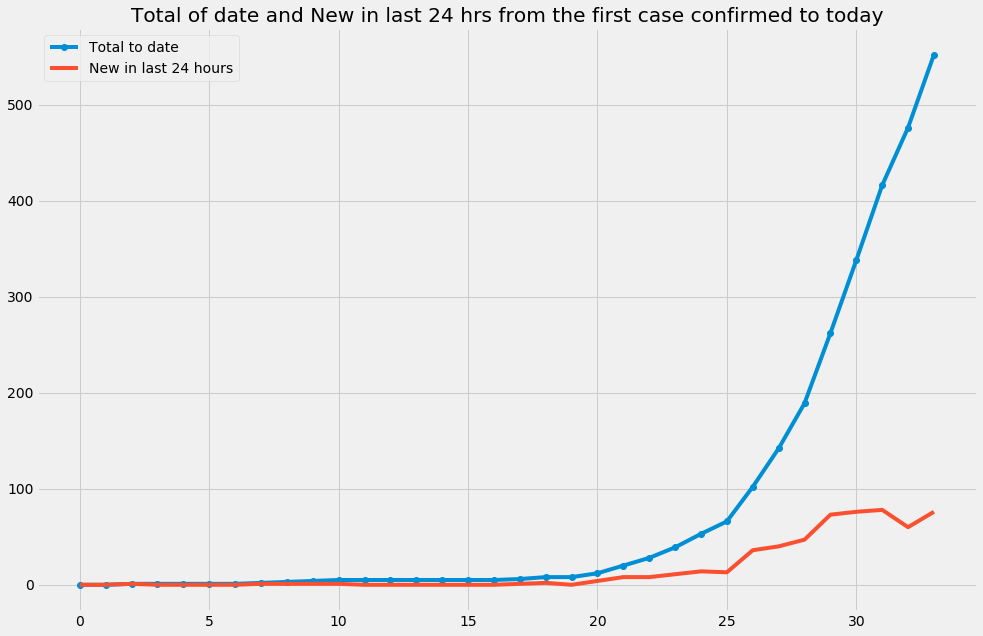

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(ind, ts_data_forecast['Total to date'], 'o-', label='Total to date')
ax.plot(ind, ts_data_forecast['New in last 24 hours'], '-', label='New in last 24 hours')
ax.set_title(u"Total of date and New in last 24 hrs from the first case confirmed to today")
ax.legend(loc='upper left')

plt.show()

In [23]:
#ts_data_forecast['shifted'] = ts_data_forecast['Total to date'].shift(1)
#ts_data_forecast

In [24]:
# population
N = 4794000
# simuation Time / Day
T = 28

In [25]:
def Logisticfquation(t,N,P0,r):
    t0=0
    exp_index=np.exp(r*t-t0)
    return(N*exp_index*P0)/N+(exp_index-1)*P0



In [26]:
import seaborn as sns
from scipy.optimize import curve_fit
import scipy.integrate as spi
import numpy as np
# import pylab as pl
import matplotlib.pyplot as pl
import pandas as pd

In [27]:
##

ts_data_forecast['ID'] = ts_data_forecast.index
ts_data_forecastts_1 = ts_data_forecast

In [28]:
ts_data_forecastts_1.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017),ID
0,2020-02-26,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,476.0,4.794,0
1,2020-02-27,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [47]:
t = np.array(ts_data_forecastts_1["ID"])
P = np.array(ts_data_forecastts_1["Total to date"])

AttributeError: module 'matplotlib.pyplot' has no attribute 'legent'

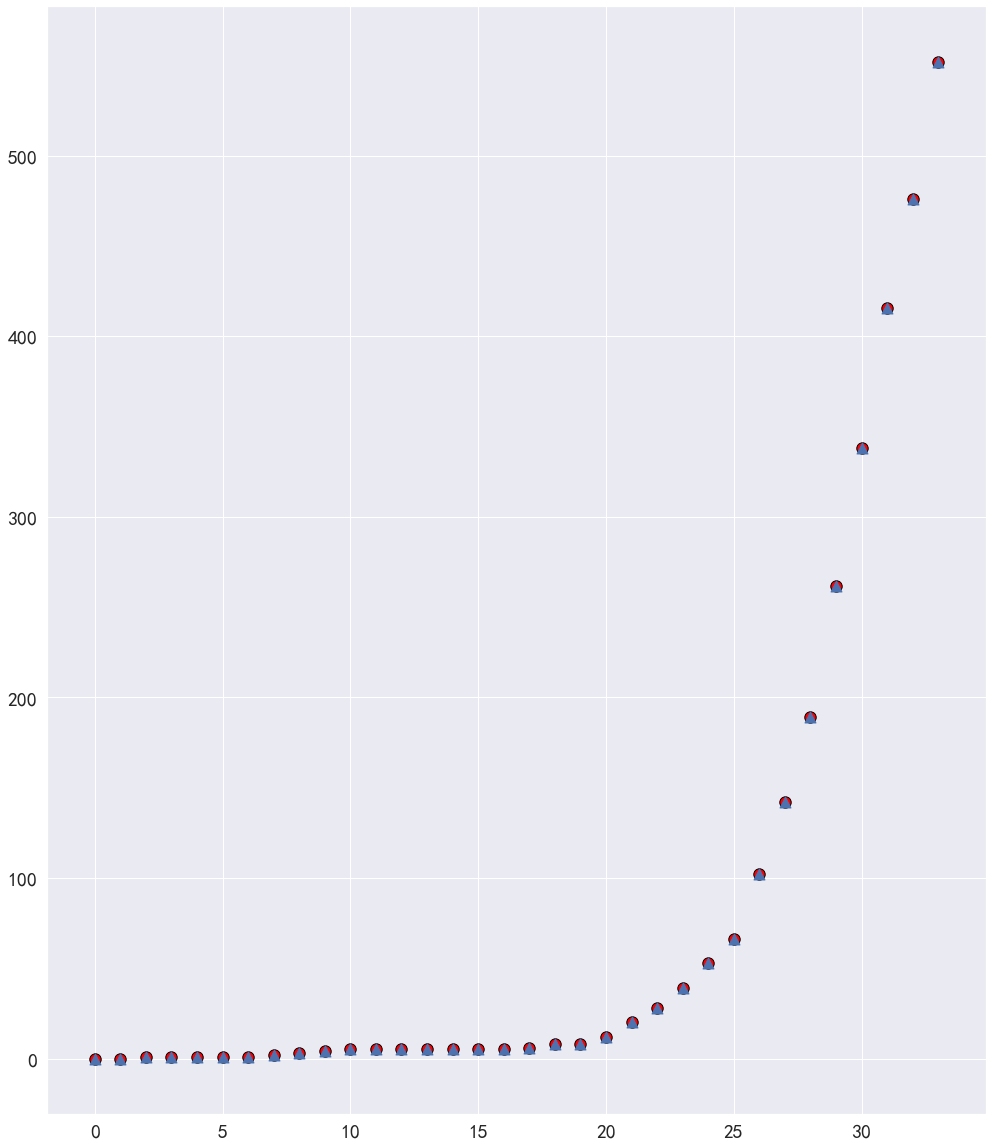

In [30]:
##
sns.set(font_scale = 1.8, font = 'SimHei')
df_future = ts_data_forecast
fig,ax = plt.subplots(figsize=(15,19))
#ax.plot( 'r', lw=2, label = 'Forecast_nz')
ax.scatter(t,P,s=130,facecolor='red',edgecolors='black',
           label='training data(before 2020-3-27)')
ax.scatter(df_future['ID'],df_future['Total to date'],s=120,marker='^',
            label='test data')

plt.legent(loc='lower right')
plt.xlabel('Date')
plt.ylabel('Total to date')
plt.title('Forecast_NZ')
plt.show()

In [ ]:
ts_data_forecastts_1.head()

I0 = 338
#计算β值，用确诊病例除以密切接触者人数
gammaguess = (data["治愈"]+data["死亡"])/data["感染者"]
print(gammaguess)
gamma = gammaguess[-7:-1].mean()
print(gamma)
beta = gamma*2.0
print(beta)
fig = pl.figure()
pl.plot(gammaguess)
pl.savefig("gama.png")

 #γ值设定为0.04，即一般病程25天
 #用最小二乘法估计β值和初始易感人数
gamma = 0.04
S0 = [i for i in range(20000, 40000, 1000)]
beta = [f for f in np.arange(1e-7, 1e-4, 1e-7)]

# 定义偏差函数
def error(res):
err = (data["感染者"].iloc[:21] - res)**2
errsum = sum(err)
return errsum

 #穷举法，找出与实际数据差的平方和最小的S0和beta值
# 结果 S0 = 39000, β = 8e-6
minSum = 1e10
minS0 = 0.0
minBeta = 0.0
bestRes = None
for S in S0:
for b in beta:
    # 模型的差分方程
            def diff_eqs_2(INP, t):
                Y = np.zeros((3))
                V = INP
                Y[0] = -b * V[0] * V[1]
                Y[1] = b * V[0] * V[1] - gamma * V[1]
                Y[2] = gamma * V[1]
                return Y
# 数值解模型方程
        INPUT = [S, I0, 0.0]
            RES = spi.odeint(diff_eqs_2, INPUT, t_range)
            errsum = error(RES[:21, 1])
            if errsum < minSum:
                minSum = errsum
                minS0 = S
                minBeta = b
                bestRes = RES
                print("S0=%d beta=%f minErr=%f" % (S, b, errsum))

    print("S0 = %d β = %f" % (minS0, minBeta))
    
    

In [338]:
import random

check point 1
[3.e+04 1.e+00 0.e+00]
[3.00000000e+04 1.00002386e+00 4.77145195e-06]
[3.00000000e+04 1.00002386e+00 4.77156578e-06]
[2.99999999e+04 1.00004772e+00 9.54313157e-06]
[2.99999999e+04 1.00004772e+00 9.54324540e-06]
[2.99999938e+04 1.00512962e+00 1.02592332e-03]
[2.99999938e+04 1.00512965e+00 1.02592983e-03]
[2.99999877e+04 1.01023734e+00 2.04746831e-03]
[2.99999877e+04 1.01023740e+00 2.04748137e-03]
[2.99999816e+04 1.01537105e+00 3.07421101e-03]
[2.99999816e+04 1.01537112e+00 3.07422414e-03]
[2.99999560e+04 1.03666845e+00 7.33369702e-03]
[2.99999560e+04 1.03666893e+00 7.33379274e-03]
[2.99999627e+04 1.03109083e+00 6.21816998e-03]
[2.99999627e+04 1.03109108e+00 6.21822163e-03]
[2.99999435e+04 1.04705470e+00 9.41095101e-03]
[2.99999435e+04 1.04705448e+00 9.41090569e-03]
[2.99999241e+04 1.06326497e+00 1.26530133e-02]
[2.99999241e+04 1.06326499e+00 1.26530180e-02]
[2.99999043e+04 1.07972645e+00 1.59453203e-02]
[2.99999043e+04 1.07972647e+00 1.59453252e-02]
[2.99998639e+04 1.11341

[  812.38827523 11143.74036329 18044.87136148]
[  751.06869648 10812.65372099 18437.27758253]
[  751.06872065 10812.65369479 18437.27758456]
[  696.00972197 10487.04519435 18817.94508368]
[  696.00973918 10487.04517588 18817.94508494]
[  638.43800322 10112.92166969 19249.64032709]
[  638.43802491 10112.92164669 19249.6403284 ]
[  587.44627577  9747.71471314 19665.83901109]
[  587.44632019  9747.71466646 19665.83901335]
[  542.16344448  9391.91092434 20066.92563118]
[  542.16346305  9391.91090614 20066.92563081]
[  501.84547391  9045.85257775 20453.30194835]
[  501.84549077  9045.85256086 20453.30194837]
[  465.85590253  8709.76260017 20825.3814973 ]
[  465.85590757  8709.76259637 20825.38149607]
[  433.6490916  8383.7658798 21183.5850286]
[  433.64909441  8383.76587852 21183.58502707]
[  404.75636391  8067.90684937 21528.33678672]
[  404.75636444  8067.90684959 21528.33678597]
[  378.77425198  7762.16428915 21860.06145888]
[  378.77425043  7762.1642923  21860.06145727]
[  355.35466332 

         Date  Total to date  New in last 24 hours  \
0  2020-02-26            0.0                   0.0   
1  2020-02-27            0.0                   0.0   
2  2020-02-28            1.0                   1.0   
3  2020-02-29            1.0                   0.0   
4  2020-03-01            1.0                   0.0   
5  2020-03-02            1.0                   0.0   
6  2020-03-03            1.0                   0.0   
7  2020-03-04            2.0                   1.0   
8  2020-03-05            3.0                   1.0   
9  2020-03-06            4.0                   1.0   
10 2020-03-07            5.0                   1.0   
11 2020-03-08            5.0                   0.0   
12 2020-03-09            5.0                   0.0   
13 2020-03-10            5.0                   0.0   
14 2020-03-11            5.0                   0.0   
15 2020-03-12            5.0                   0.0   
16 2020-03-13            5.0                   0.0   
17 2020-03-14            6.0

Total of forecast:431 loc:32


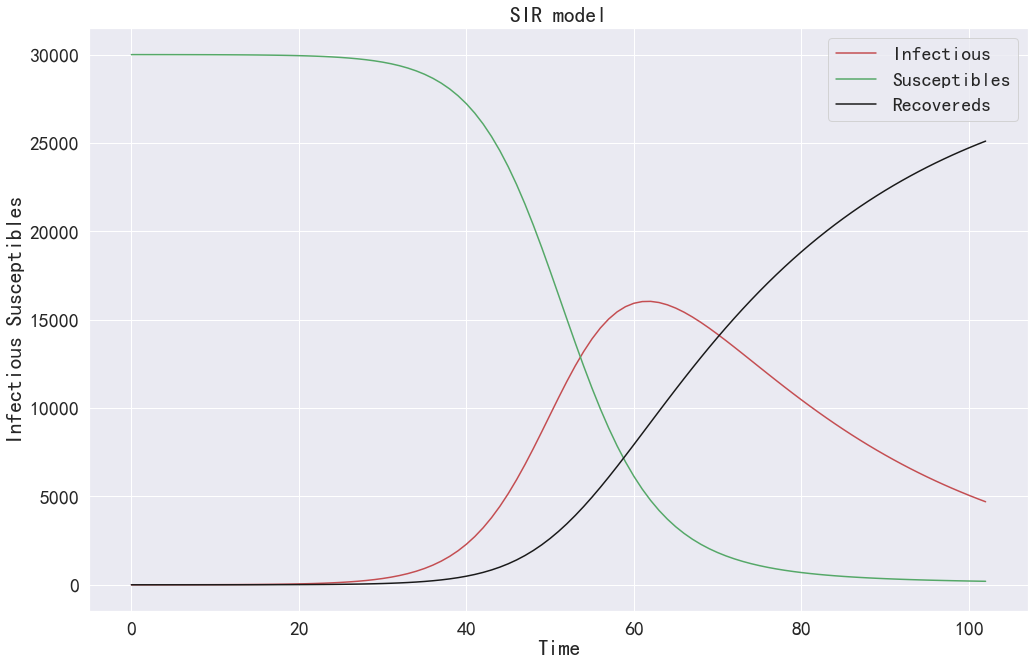

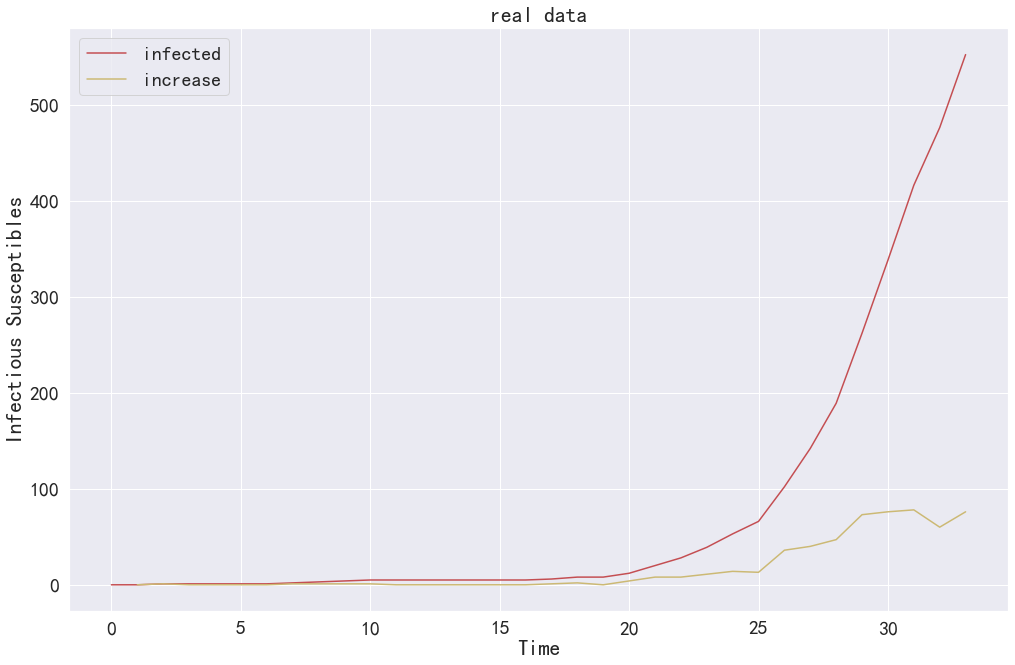

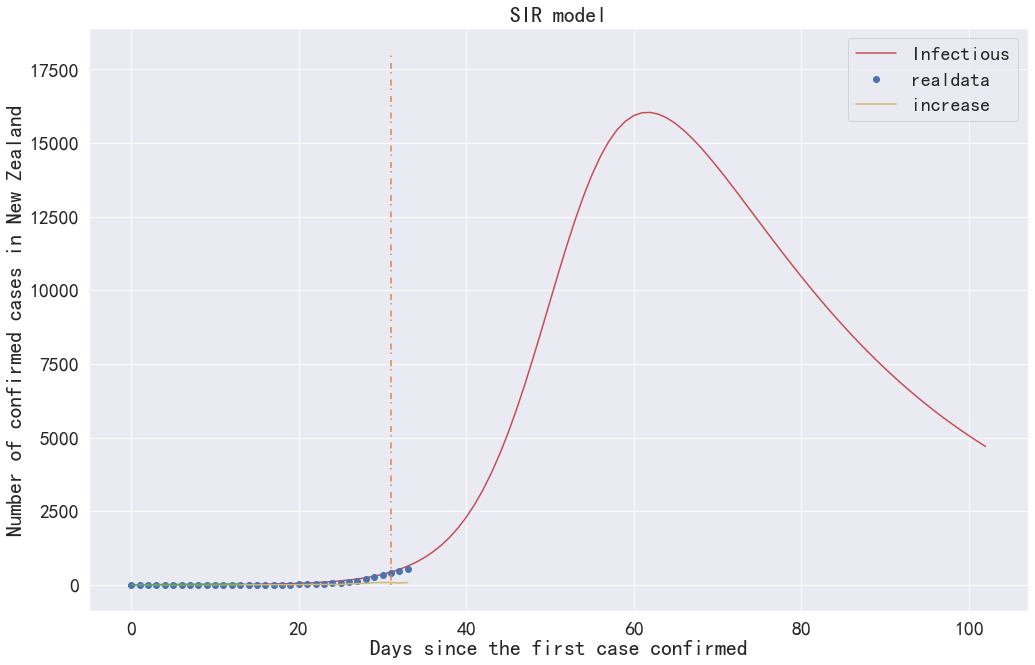

In [392]:
d1 = datetime.datetime(2020,2,26)   # 第一个日期
d2 = datetime.datetime.now()  # 第二个日期
interval = d2 - d1                   # 两日期差距
n = interval.days 

beta = 8e-6
gamma = 0.04

### lockdown check point start
x111 = 1
if (n-28) < 14:
    print("check point 1")
    ### change value of TS and TS1 below
    TS= random.uniform(0.98,0.986)
    TS_add = random.uniform(0.007,0.015)
    TS1=TS + TS_add
        
if (n-28) >= 14:
    TS= random.uniform(0.97,0.973)
    TS1=random.uniform(0.973,0.9736)
    x111 = 1
    for x111 in range(51-28-21):
        TS -= 0.003
        TS1 -= 0.003
        
elif (n-28) >= 21:
    x111 = 1
    TS= random.uniform(0.96,0.959)
    TS1=random.uniform(0.973,0.9736)
    for x111 in range(51-28-21):
        TS -= -0.005
        TS1 -= -0.005
### lockdown check point end

#TS = 0.983 #0.983 #0.97 #0.99085 #0.95
#TS1 = 0.993 #1.00125 #0.983 
ND = 100.0
S0 = 30000
I0 = 1
S1 = 30000
I1 = 1
INPUT = [S0, I0, 0.0]
INPUT_1 = [S1, I1, 0.0]


# 模型的差分方程
def diff_eqs(INP, t):
    Y = np.zeros((3))
    V = INP
    print(V)
    Y[0] = -beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y


if __name__ == "__main__":
    t_start = 0.0
    t_start_1 = 0.0
    t_end = ND
    t_inc = TS
    t_inc_1 = TS1
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    t_range_1 = np.arange(t_start_1, t_end+t_inc_1, t_inc_1)
    t_range_2 = np.arange(t_start, t_end+t_inc, t_inc)
    RES = spi.odeint(diff_eqs, INPUT, t_range)
    
    RES_1 = spi.odeint(diff_eqs, INPUT_1, t_range_1)
    
    RES_2 = spi.odeint(diff_eqs, INPUT, t_range_2)
    #print(S0,I0)
    print(RES)
    #print(len(RES))

    fig = pl.figure()
    pl.subplot(111)
    pl.plot(RES[:, 1], "-r", label = "Infectious")
    pl.plot(RES[:, 0], "-g", label = "Susceptibles")
    pl.plot(RES[:, 2], "-k", label = "Recovereds")
    pl.legend(loc = 0)
    pl.title("SIR model")
    pl.xlabel("Time")
    pl.ylabel("Infectious Susceptibles")
    pl.savefig("result.png")

# 读取数据
    data = ts_data_forecastts_1
    print(data)

# 数据作图
    fig = pl.figure()
    pl.subplot(111)
    pl.plot(data["Total to date"], "-r", label = "infected")
    pl.plot(data["Total to date"]-data["Total to date"].shift(1), "-y", label = "increase")
    pl.legend(loc = 0)
    pl.title("real data")
    pl.xlabel("Time")
    pl.ylabel("Infectious Susceptibles")
    pl.savefig("realdata.png")


    print("预测最大感染人数:%d 位置:%d" % (RES[:,1].max(), np.argmax(RES[:, 1])))
    print("预测感染人数:%d 位置:%d" % (RES[31:32,1].max(), 32))
# 将预测值与真实值画到一起
    fig = pl.figure()
    pl.subplot(111)
    pl.plot(RES[:, 1], "-r", label = "Infectious")
    pl.plot(data["Total to date"], "o", label = "realdata")
    pl.plot(data["Total to date"]-data["Total to date"].shift(1), "-y", label = "increase")
   # pl.plot([31:100],ydata.RES_1[:, 1],"-g", label = "Infectious after lockdown")
    #plt.annotate(s='Lockdown',xy=(31,262),xytext=(31,100))
    #plt.annotate('Lockdown', xy=(31, 262) ,xytext=(31, 10000),arrowprops=dict(facecolor='black', shrink=0.05))
    plt.plot([31,31],[0,18000],dashes=[1,2,4,4])
   # plt.axhline(xy=([31,0]), color='r', linestyle='-')
    plt.plot([13,0],[31,0])
    pl.legend(loc = 0)
    pl.title("SIR model")
    pl.xlabel("Days since the first case confirmed")
    pl.ylabel("Number of confirmed cases in New Zealand")
    pl.savefig("test.png")
    print("Total of forecast:%d loc:%d" % (RES[31:32,1].max(), 32))

In [393]:
TS,TS1,n

(0.9818913937262221, 0.9920239619031924, 33)

In [394]:
d1 = datetime.datetime(2020,2,26)   # 第一个日期
d2 = datetime.datetime.now()  # 第二个日期
interval = d2 - d1                   # 两日期差距
interval.days 


33

In [395]:
d2_now = ("%d-%d-%d" % (d2.year, d2.month, d2.day))
d2_now

'2020-3-30'

In [396]:
print("Forecast - COVID-19 in NZ")
#d1 = datetime.datetime(2020,2,26)   # 第一个日期
#d2 = datetime.datetime.now()  # 第二个日期
#interval = d2 - d1                   # 两日期差距
#n = interval.days 

tomorrow = datetime.datetime.now() + datetime.timedelta(days=1) 

d2_now = ("%d-%d-%d" % (d2.year, d2.month, d2.day))
d2_tomorrow =  ("%d-%d-%d" % (tomorrow.year, tomorrow.month, tomorrow.day))
print("\nDate of today : %s" % d2_now)
print("Date of tomorrow : %s\n" % d2_tomorrow)

print("Days since the first case confirmed: %d" % (n-1))
print("自第一例确诊天数:%d" % (n-1))
print("\n")

print("Days in lockdown: %d" % (n-28))
print("封城天数: %d\n" % (n-28))
print("Total of now(day:%d): %d " % (n-1,ts_data_forecast['Total to date'].max()))
print("Total of now(day:%d) & including in both confirmed and probable cases: %d" % (n-1,ts_data_forecast['Total confirmed and probable cases'].max()))
#print("Total of now(day:%d) & including in both confirmed and probable cases: %d" % (n-1,RES_1[n-1:n,1].max()))
print("\n")

#print("预测感染人数:%d 自第一例确诊开始天数: %d" % (RES[n:n+1,1].max(), n))
print("预测感染人数: %d            被预测日期: %s" % (RES[n:n+1,1].max(), d2_tomorrow))
print("Total of forecast: %d      The date to be predicted: %s" % (RES[n:n+1,1].max(), d2_tomorrow))
print("Prediction - 24hrs new csses: %d\n" % (RES[n:n+1,1].max()-ts_data_forecast['Total to date'].max()))

print("Total of forecast(including in both confirmed and probable cases): %d      The date to be predicted: %s" % (RES_1[n:n+1,1].max(), d2_tomorrow))
print("Prediction - 24hrs new cases: %d\n" % (RES_1[n:n+1,1].max()-ts_data_forecast['Total confirmed and probable cases'].max()))

print("Prediction - The maxinum number of cases in NZ : %d on day since the first case confirmed: %d " % (RES[:,1].max(), np.argmax(RES[:, 1])-1))
print("预测最大感染人数:%d 自第一例确诊天数: %d" % (RES[:,1].max(), np.argmax(RES[:, 1])-1))

print("\nPS. Because it's less than 2 weeks since lockdown, the model of β, γ and other element are still using previous values (before lockdown).\n")
print("    Factors will be updated with an update on the official number of confirmed cases.\n")

print("    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    \n")

Forecast - COVID-19 in NZ

Date of today : 2020-3-30
Date of tomorrow : 2020-3-31

Days since the first case confirmed: 32
自第一例确诊天数:32


Days in lockdown: 5
封城天数: 5

Total of now(day:32): 552 
Total of now(day:32) & including in both confirmed and probable cases: 589


预测感染人数: 632            被预测日期: 2020-3-31
Total of forecast: 632      The date to be predicted: 2020-3-31
Prediction - 24hrs new csses: 80

Total of forecast(including in both confirmed and probable cases): 675      The date to be predicted: 2020-3-31
Prediction - 24hrs new cases: 86

Prediction - The maxinum number of cases in NZ : 16036 on day since the first case confirmed: 61 
预测最大感染人数:16036 自第一例确诊天数: 61

PS. Because it's less than 2 weeks since lockdown, the model of β, γ and other element are still using previous values (before lockdown).

    Factors will be updated with an update on the official number of confirmed cases.

    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    



print("Forecast - COVID-19 in NZ")
d1 = datetime.datetime(2020,2,26)   # 第一个日期
d2 = datetime.datetime.now()  # 第二个日期
interval = d2 - d1                   # 两日期差距
n = interval.days

tomorrow = datetime.datetime.now() + datetime.timedelta(days=1) 

d2_now = ("%d-%d-%d" % (d2.year, d2.month, d2.day))
d2_tomorrow =  ("%d-%d-%d" % (tomorrow.year, tomorrow.month, tomorrow.day))
print("\nDate of today : %s" % d2_now)
print("Date of tomorrow : %s\n" % d2_tomorrow)

print("Days since the first case confirmed: %d" % (n-1))
print("自第一例确诊天数:%d" % (n-1))
print("\n")

print("Days in lockdown: %d" % (n-28))
print("封城天数: %d\n" % (n-28))
#print("Total of now(day:%d): %d " % (n-1,RES[n-1:n,1].max()))
print("Total of now(day:%d): %s " % (n-1, ts_data_forecast['Total to date'].max()))
print("Total of now(day:%d) & including in both confirmed and probable cases: %d" % (n-1,RES_1[n-1:n,1].max()))
print("\n")

#print("预测感染人数:%d 自第一例确诊开始天数: %d" % (RES[n:n+1,1].max(), n))
print("预测感染人数: %d            被预测日期: %s" % (RES[n-1:n,1].max(), d2_tomorrow))
print("Total of forecast: %d      The date to be predicted: %s" % (RES[n:n+1,1].max(), d2_tomorrow))
print("Prediction - 24hrs new csses: %d\n" % (RES[n:n+1,1].max()-RES[n-1:n,1].max()))

print("Total of forecast(including in both confirmed and probable cases): %d      The date to be predicted: %s" % (RES_1[n-1:n,1].max(), d2_tomorrow))
print("Prediction - 24hrs new cases: %d\n" % (RES_1[n:n+1,1].max()-RES_1[n-1:n,1].max()))

print("Prediction - The maxinum number of cases in NZ : %d on day since the first case confirmed: %d " % (RES[:,1].max(), np.argmax(RES[:, 1])-1))
print("预测最大感染人数:%d 自第一例确诊天数: %d" % (RES[:,1].max(), np.argmax(RES[:, 1])-1))

print("\nPS. Because it's less than 2 weeks since lockdown, the model of β, γ and other element are still using previous values (before lockdown).\n")
print("    Factors will be updated with an update on the official number of confirmed cases.\n")

In [243]:
50-28-21

1

In [278]:
def createCounter():
    x111 = 1
    def counter():
        nonlocal x111 # 使用外层变量
        x111 += 1
        return x111
    return counter
print("%d" % x111)

1


In [348]:
### lockdown check point start
x111 = 1
if (n-28) < 14:
    print("check point 1")
    ### change value of TS and TS1 below
    TS= random.uniform(0.983,1)
    TS1=random.uniform(0.993,1)
    while TS >= TS1:
        TS= random.uniform(0.983,1)
        TS1=random.uniform(0.993,1)
if (n-28) >= 14:
    TS= random.uniform(0.97,0.973)
    TS1=random.uniform(0.973,0.9736)
    x111 = 1
    for x111 in range(51-28-21):
        TS -= 0.003
        TS1 -= 0.003
        
elif (n-28) >= 21:
    x111 = 1
    TS= random.uniform(0.96,0.959)
    TS1=random.uniform(0.973,0.9736)
    for x111 in range(51-28-21):
        TS -= -0.005
        TS1 -= -0.005
### lockdown check point end

TS, TS1, n


check point 1


(0.9853496151040985, 0.9983470869037443, 33)